In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.drop(['region'],axis=1,inplace=True)

In [5]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


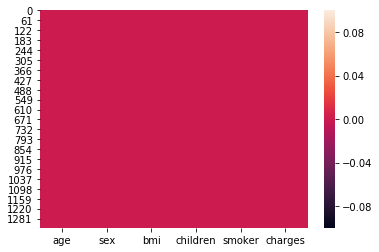

In [6]:
sns.heatmap(df.isnull())

C:\Users\Chintan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


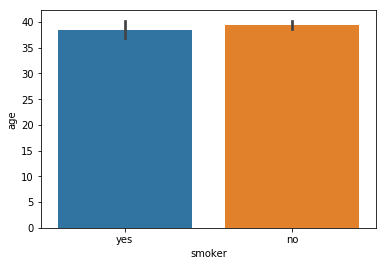

In [7]:
sns.barplot(x='smoker',y='age', data=df)

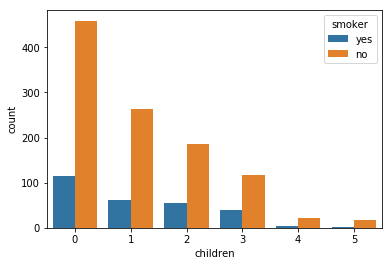

In [8]:
sns.countplot(x='children',data=df,hue='smoker')

C:\Users\Chintan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


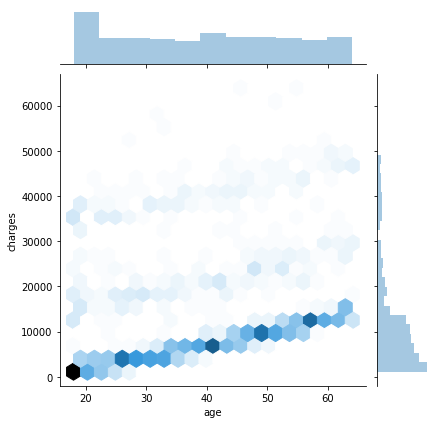

In [9]:
sns.jointplot(x='age',y='charges',data=df,kind='hex')

C:\Users\Chintan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


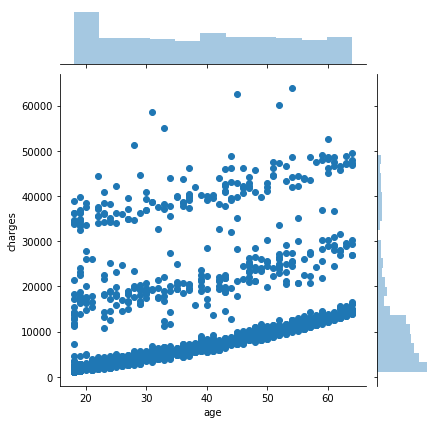

In [10]:
sns.jointplot(x='age',y='charges',data=df,)

C:\Users\Chintan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


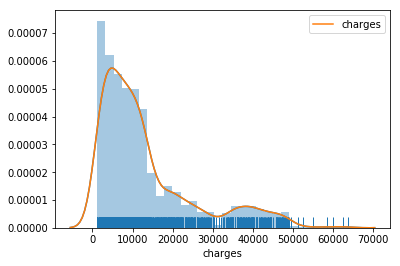

In [11]:
sns.distplot(df['charges'])
sns.kdeplot(df['charges'])
sns.rugplot(df['charges'])

In [12]:
sex = pd.get_dummies(df['sex'],drop_first=True)
smoker = pd.get_dummies(df['smoker'],drop_first=True)

In [13]:
sex.head()

,male
0,0
1,1
2,1
3,1
4,1


In [14]:
smoker.head()

,yes
0,1
1,0
2,0
3,0
4,0


In [15]:
df.drop(['sex','smoker'],axis=1,inplace=True)

In [16]:
df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [17]:
df1 = pd.concat([df,sex,smoker],axis=1)

In [18]:
df1.head()

,age,bmi,children,charges,male,yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


In [19]:
df1.corr()

,age,bmi,children,charges,male,yes
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251
male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185
yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000


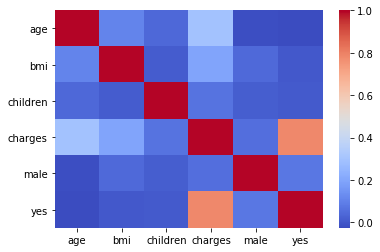

In [20]:
sns.heatmap(df1.corr(),cmap='coolwarm')

In [21]:
X = df1.drop('charges',axis=1)

In [22]:
X.head()

,age,bmi,children,male,yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0


In [23]:
y = df1['charges']

In [24]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [28]:
X_train.head()

,age,bmi,children,male,yes
874,44,21.85,3,1,0
1017,26,34.20,2,0,0
1031,55,35.20,0,0,1
1263,43,29.90,1,0,0
550,63,30.80,0,1,0


In [29]:
X_test.head()

,age,bmi,children,male,yes
74,44,27.400,2,1,0
46,18,38.665,2,0,0
865,40,29.900,2,1,0
1190,31,32.775,2,0,0
1292,21,23.210,0,1,0


In [30]:
len(y_train)

936

In [37]:
len(y_test)

402

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
ypred = lr.predict(X_test)

In [36]:
lr.coef_

array([  263.57057157,   339.93670769,   551.09329079,  -106.53707738,
       23823.93093193])

In [39]:
coef1 = pd.DataFrame(data=lr.coef_,columns=['coefficient'],index=X.columns)

In [40]:
coef1

,coefficient
age,263.570572
bmi,339.936708
children,551.093291
male,-106.537077
yes,23823.930932


# Evaluating Linear Regression Model

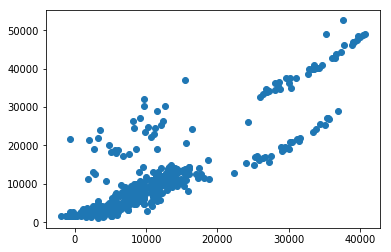

In [41]:
plt.scatter(ypred,y_test)

(array([ 29.,  16., 127., 135.,  20.,  42.,   8.,  12.,   7.,   6.]),
 array([-11432.09827266,  -8043.99375304,  -4655.88923343,  -1267.78471381,
          2120.3198058 ,   5508.42432542,   8896.52884504,  12284.63336465,
         15672.73788427,  19060.84240388,  22448.9469235 ]),
 <a list of 10 Patch objects>)

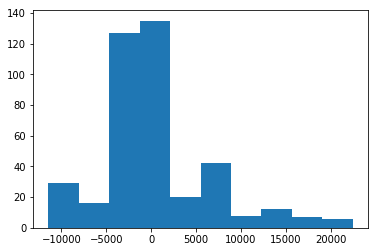

In [43]:
plt.hist(y_test-ypred)

# Mean absolute error to compare two models

In [46]:
from sklearn import metrics

In [47]:
metrics.mean_absolute_error(y_test,ypred)

4159.0875228944715

# SVM

In [48]:
from sklearn.svm import SVR

In [49]:
svr = SVR()

In [50]:
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [51]:
svr_ypred = svr.predict(X_test)

In [54]:
metrics.mean_absolute_error(y_test,svr_ypred)

7965.393384398054

# Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
rfc = RandomForestRegressor(n_estimators=100)

In [57]:
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [58]:
rfc_ypred = rfc.predict(X_test)

In [59]:
metrics.mean_absolute_error(y_test,rfc_ypred)

2791.017731332271

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
dtr = DecisionTreeRegressor()

In [62]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [63]:
dtr_ypred = dtr.predict(X_test)

In [64]:
metrics.mean_absolute_error(y_test,dtr_ypred)

3077.3116339925373